In [1]:
# 查看工作路径
import os
 
print(os.getcwd())
 
 
# 修改工作路径
import os
from google.colab import drive
drive.mount('/content/drive/')
 
path = "/content/drive/MyDrive/Colab Notebooks/Finlab/小資選股策略/"
os.chdir(path)

os.getcwd() #查看當前路徑

C:\Users\User\Desktop\python\finlab


ModuleNotFoundError: No module named 'google'

# 打造客製化看盤軟體

In [2]:
import pandas as pd
import sqlite3
import os

# connect to sql
conn = sqlite3.connect(os.path.join('data', "data.db"))

# read data from sql
df = pd.read_sql('select stock_id, date, 開盤價, 收盤價, 最高價, 最低價, 成交股數 from price where stock_id="2330"', conn,
                index_col=['date'], parse_dates=['date'])

# rename the columns of dataframe
df.rename(columns={'收盤價':'close', '開盤價':'open', '最高價':'high', '最低價':'low', '成交股數':'volume'}, inplace=True)

df.head()

ModuleNotFoundError: No module named 'pandas'

### install TA-Lib
https://github.com/mrjbq7/ta-lib

<AxesSubplot:xlabel='date'>

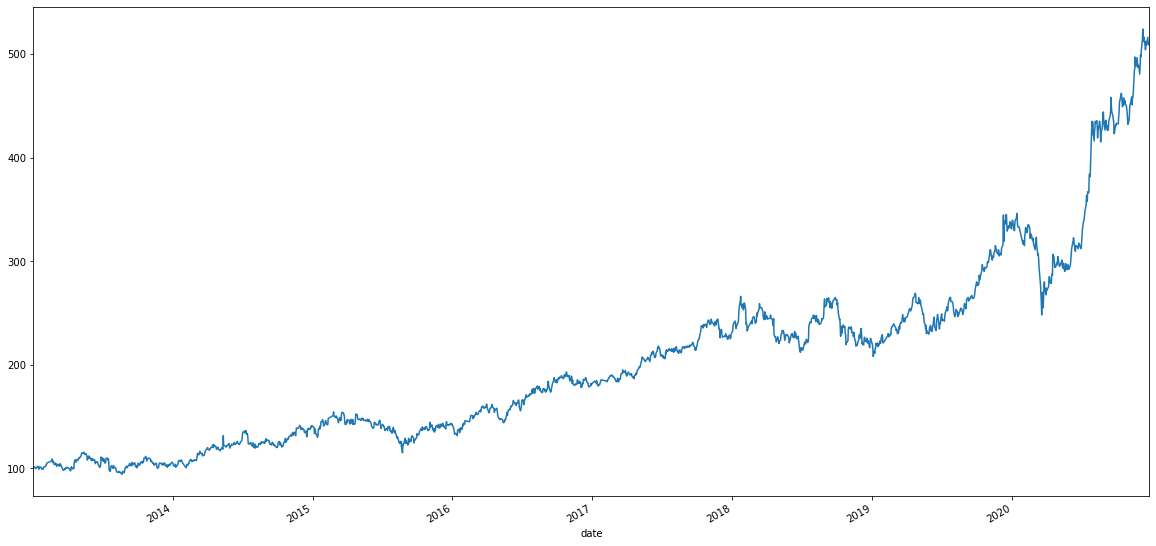

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## change the size of plot
plt.rcParams["figure.figsize"] = (20,10)

## plot close price
df['close'].plot()

<AxesSubplot:xlabel='date'>

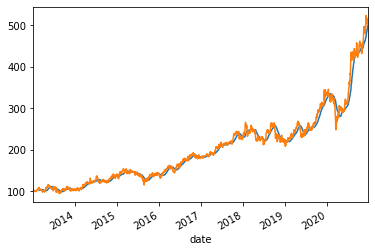

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from talib import abstract

# 畫出均線
abstract.SMA(df).plot()

# 畫出收盤價
df['close'].plot()

RSI([input_arrays], [timeperiod=14])

Relative Strength Index (Momentum Indicators)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 14
Outputs:
    real


<AxesSubplot:xlabel='date'>

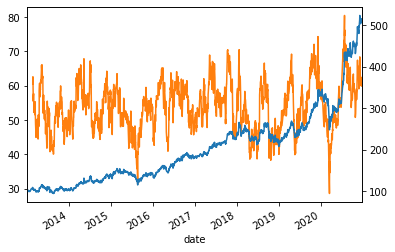

In [4]:
print(abstract.RSI)

# 畫出收盤價 並且將收盤價的y軸在右方
df['close'].plot(secondary_y=True)

# 讓 RSI 的y軸在左方
abstract.RSI(df, timeperiod=30).plot()

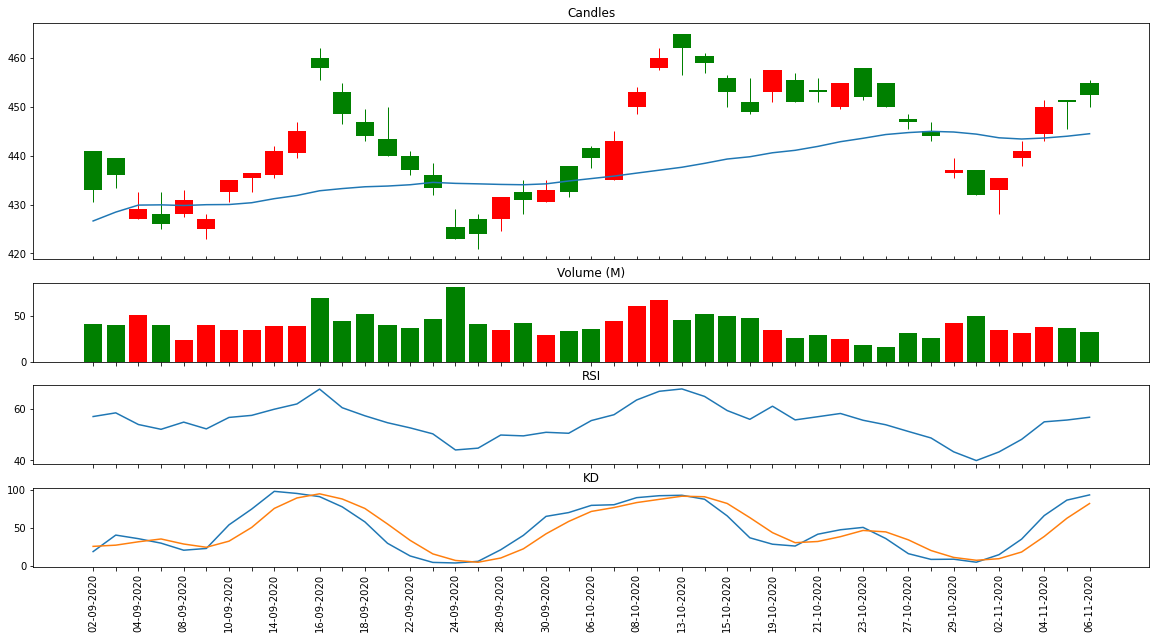

In [5]:
from talib import abstract

# 創建各種指標
SMA = abstract.SMA(df)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)

from finlab.plot_candles import plot_candles
plot_candles(
             # 起始時間、結束時間
             start_time='2020-09-02',
             end_time='2020-11-07',
             
             # 股票的資料
             pricing=df, 
             title='Candles', 
    
             # 是否畫出成交量？
             volume_bars=True, 
    
             # 將某些指標（如SMA）跟 K 線圖畫在一起
             overlays=[SMA], 
    
             # 將某些指標（如RSI, STOCH）單獨畫在獨立的畫格中
             technicals = [RSI, STOCH],
    
             # 重新命名額外的畫格名稱（跟指標名稱一樣就可以囉！）
             technicals_titles=['RSI', 'KD']
            )

----------------------------------------------------

 # Ta-lib安裝

In [13]:
##  https://stackoverflow.com/questions/61362725/how-to-install-talib-module-on-google-colab-instance-using-pip

!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

  Using cached https://files.pythonhosted.org/packages/ac/cf/681911aa31e04ba171ab4d523a412f4a746e30d3eacb1738799d181e028b/TA-Lib-0.4.19.tar.gz
  Created wheel for ta-lib: filename=TA_Lib-0.4.19-cp36-cp36m-linux_x86_64.whl size=1437786 sha256=8dc9a1c7fe1d7ddf6161bae37eb2b03248f6601131b405f37160e143dddc4711
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3